Predictive analysis of customer churn

Customer Churn Prediction:
Problem Definition:

Type: Binary Classification Problem
Objective: Predict whether a customer will leave (churn) or stay with the company

Business Perspective:

Predict customer likelihood of discontinuing service
Identify at-risk customers before they churn
Enable proactive retention strategies

Key Considerations:

Target Variable: Churn (Yes/No)
Goal: Minimize customer loss
Potential Features:

Customer demographics
Service usage
Contract details
Customer interaction history
Payment behavior



Potential Business Impacts:

Reduce customer acquisition costs
Improve customer retention
Optimize marketing strategies
Enhance customer experience

Predict whether a customer will churn (leave the service) or stay, using historical customer data.
Key Metrics to Evaluate:
Accuracy
Precision, Recall, F1-score
Area Under the ROC Curve (AUC-ROC)

In [38]:
pip install -U scikit-learn imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler,LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,f1_score,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline as make_pipeline_imb

import warnings
warnings.filterwarnings('ignore')

In [3]:
csv_file = 'C:/Users/siyal/Downloads/Customer_churn.csv'

In [4]:
data = pd.read_csv(csv_file)

Intitial Data Exploration

In [5]:
print(data.head())

   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  


In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB
None


In [7]:
print(data.describe())

         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.023379         15.498850   
std         3.114005       8.852211    260.874809          8.638436   
min         0.000000       0.000000    100.000000          1.000000   
25%         3.000000      10.000

In [8]:
print(data.isnull().sum())

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [9]:
print(data.drop_duplicates())

       CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0               1   22  Female      25               14              4   
1               2   41  Female      28               28              7   
2               3   47    Male      27               10              2   
3               4   35    Male       9               12              5   
4               5   53  Female      58               24              9   
...           ...  ...     ...     ...              ...            ...   
64369       64370   45  Female      33               12              6   
64370       64371   37    Male       6                1              5   
64371       64372   25    Male      39               14              8   
64372       64373   50  Female      18               19              7   
64373       64374   52  Female      45               15              9   

       Payment Delay Subscription Type Contract Length  Total Spend  \
0                 27             Basic  

Let's Do Exploratory Data Analysis

Churn
0    33881
1    30493
Name: count, dtype: int64


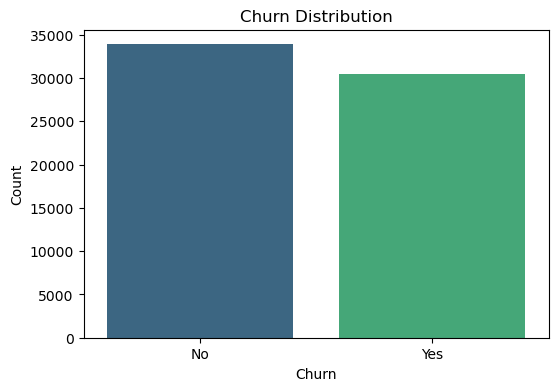

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
churn_counts = data['Churn'].value_counts()
print(churn_counts)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Descriptive Statistics

In [11]:
# Summary statistics for numerical columns
summary_stats = data.describe()
print(summary_stats)

         CustomerID           Age        Tenure  Usage Frequency  \
count  64374.000000  64374.000000  64374.000000     64374.000000   
mean   32187.500000     41.970982     31.994827        15.080234   
std    18583.317451     13.924911     17.098234         8.816470   
min        1.000000     18.000000      1.000000         1.000000   
25%    16094.250000     30.000000     18.000000         7.000000   
50%    32187.500000     42.000000     33.000000        15.000000   
75%    48280.750000     54.000000     47.000000        23.000000   
max    64374.000000     65.000000     60.000000        30.000000   

       Support Calls  Payment Delay   Total Spend  Last Interaction  \
count   64374.000000   64374.000000  64374.000000      64374.000000   
mean        5.400690      17.133952    541.023379         15.498850   
std         3.114005       8.852211    260.874809          8.638436   
min         0.000000       0.000000    100.000000          1.000000   
25%         3.000000      10.000

Analyze Churn vs. Numerical Variables

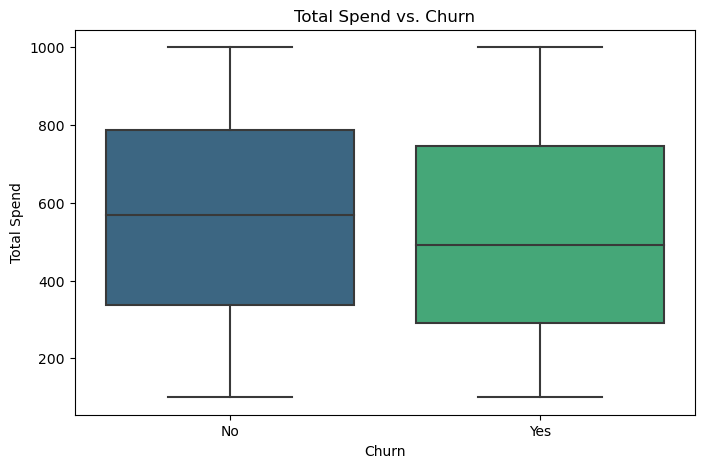

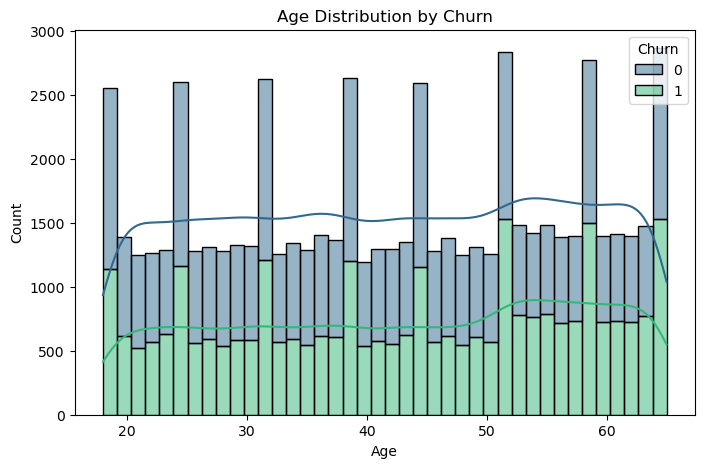

In [12]:
# Distribution of Total Spend by Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Churn', y='Total Spend', palette="viridis")
plt.title('Total Spend vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Total Spend')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Distribution of Age by Churn
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='Age', hue='Churn', multiple='stack', palette="viridis", kde=True)
plt.title('Age Distribution by Churn')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Correlation Analysis

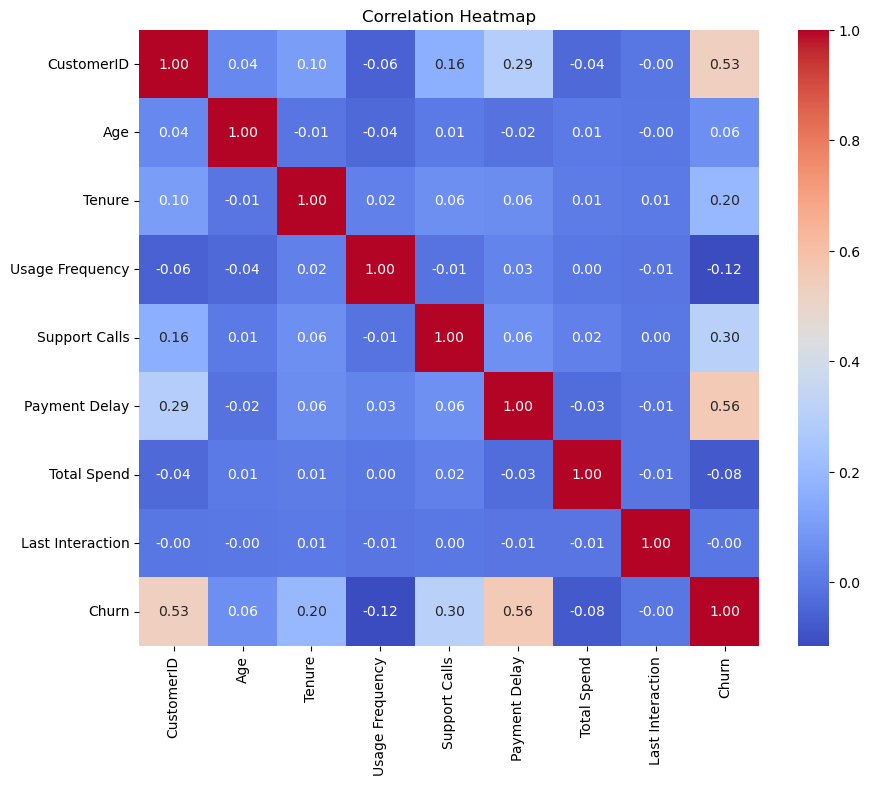

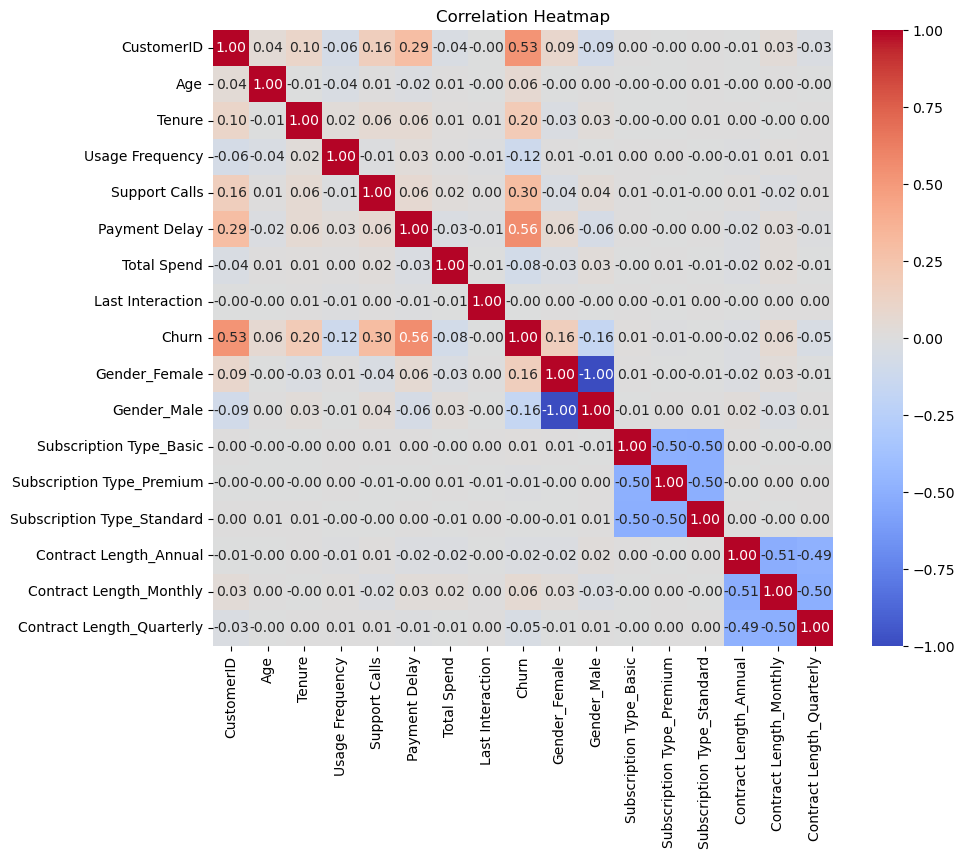

In [13]:
# Select only numeric columns before creating the correlation matrix
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()
# One-hot encode categorical columns
data_encoded = pd.get_dummies(data)
corr = data_encoded.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

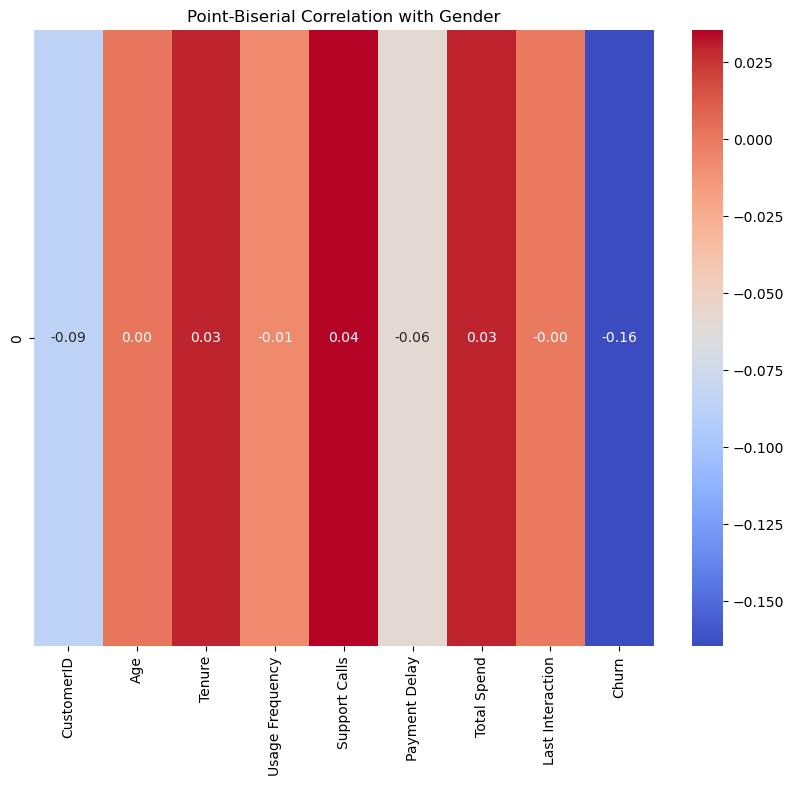

In [14]:
# If 'Female' is a binary categorical column
from scipy import stats

# Encode categorical column
data['Gender_encoded'] = (data['Gender'] == 'Male').astype(int)

# Calculate correlations
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = data[numeric_cols].corrwith(data['Gender_encoded'])

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_frame().T, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Point-Biserial Correlation with Gender')
plt.show()

Temporal Analysis

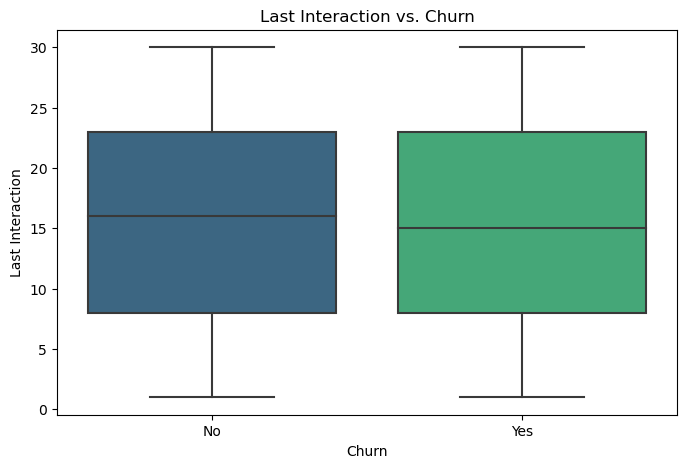

In [15]:
# Last Interaction vs. Churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Churn', y='Last Interaction', palette="viridis")
plt.title('Last Interaction vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Last Interaction')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

Outlier Detection

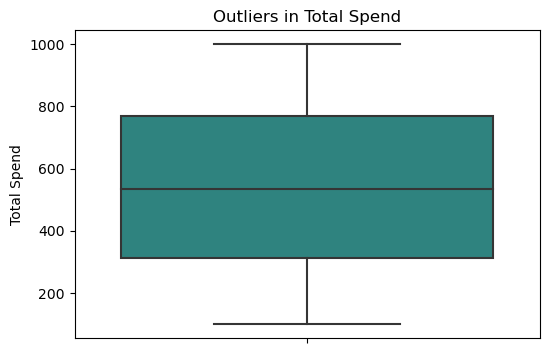

In [16]:
# Detecting outliers in Total Spend
plt.figure(figsize=(6, 4))
sns.boxplot(data=data, y='Total Spend', palette="viridis")
plt.title('Outliers in Total Spend')
plt.ylabel('Total Spend')
plt.show()

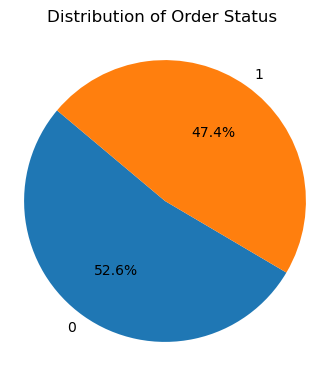

In [17]:
plt.figure(figsize=(4,4))
output_counts = data['Churn'].value_counts()
plt.pie(output_counts, labels=output_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')
plt.title('Distribution of Order Status \n')
plt.ylabel('')
plt.show()

The target column looks balanced, accuracy would be a good

Box plot for numerical features:


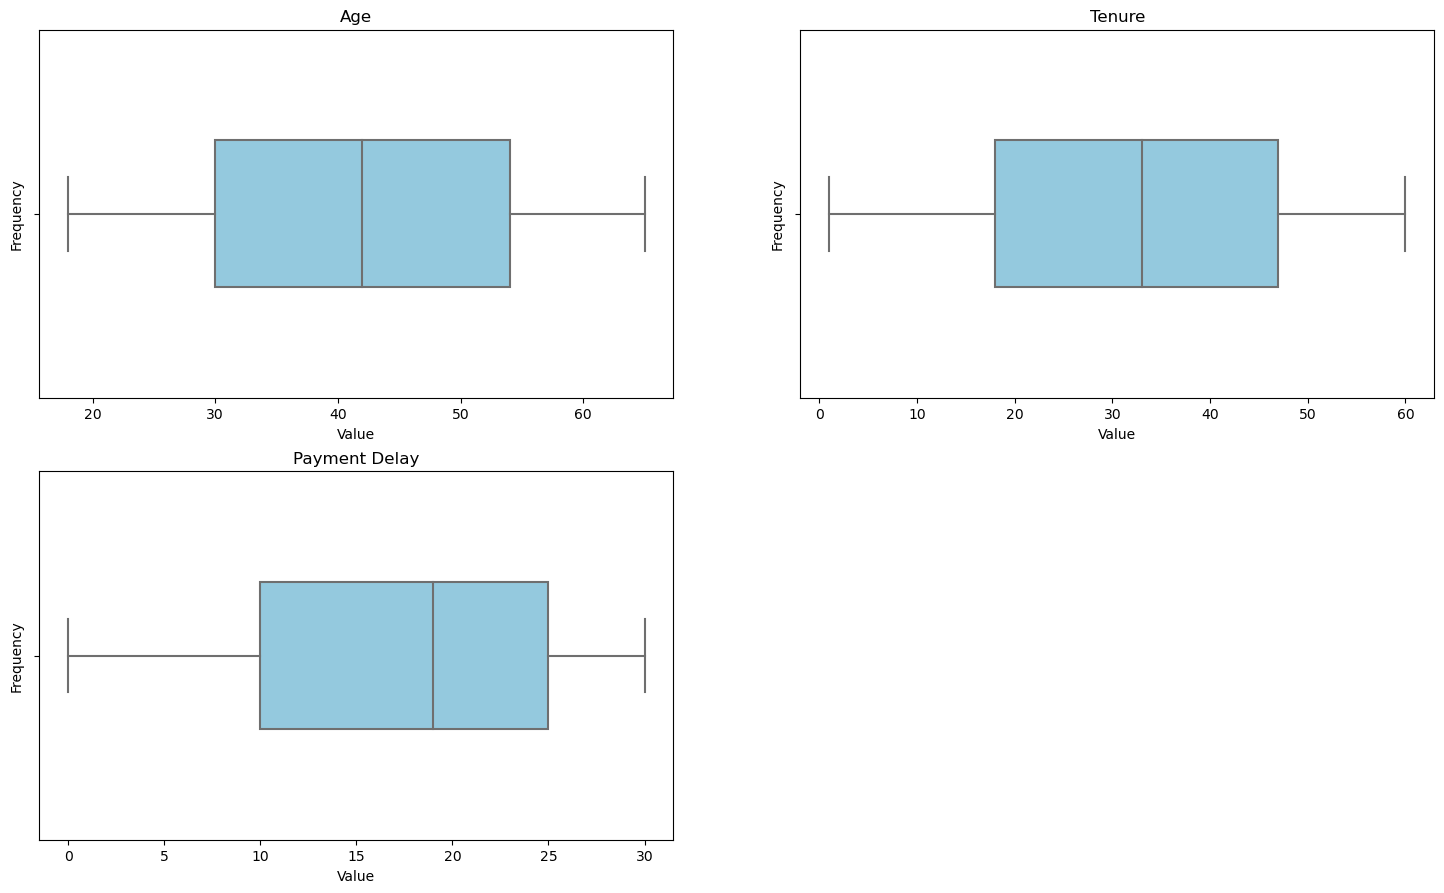

In [18]:
print("Box plot for numerical features:")
plt.figure(figsize=(18,22))
numeric_features = ['Age','Tenure','Payment Delay']
for i, column in enumerate(numeric_features):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x=data[column], color='skyblue', width=0.4)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Observation:
It does not look like there are outliers in the numerical features

Count plot for categorical features:


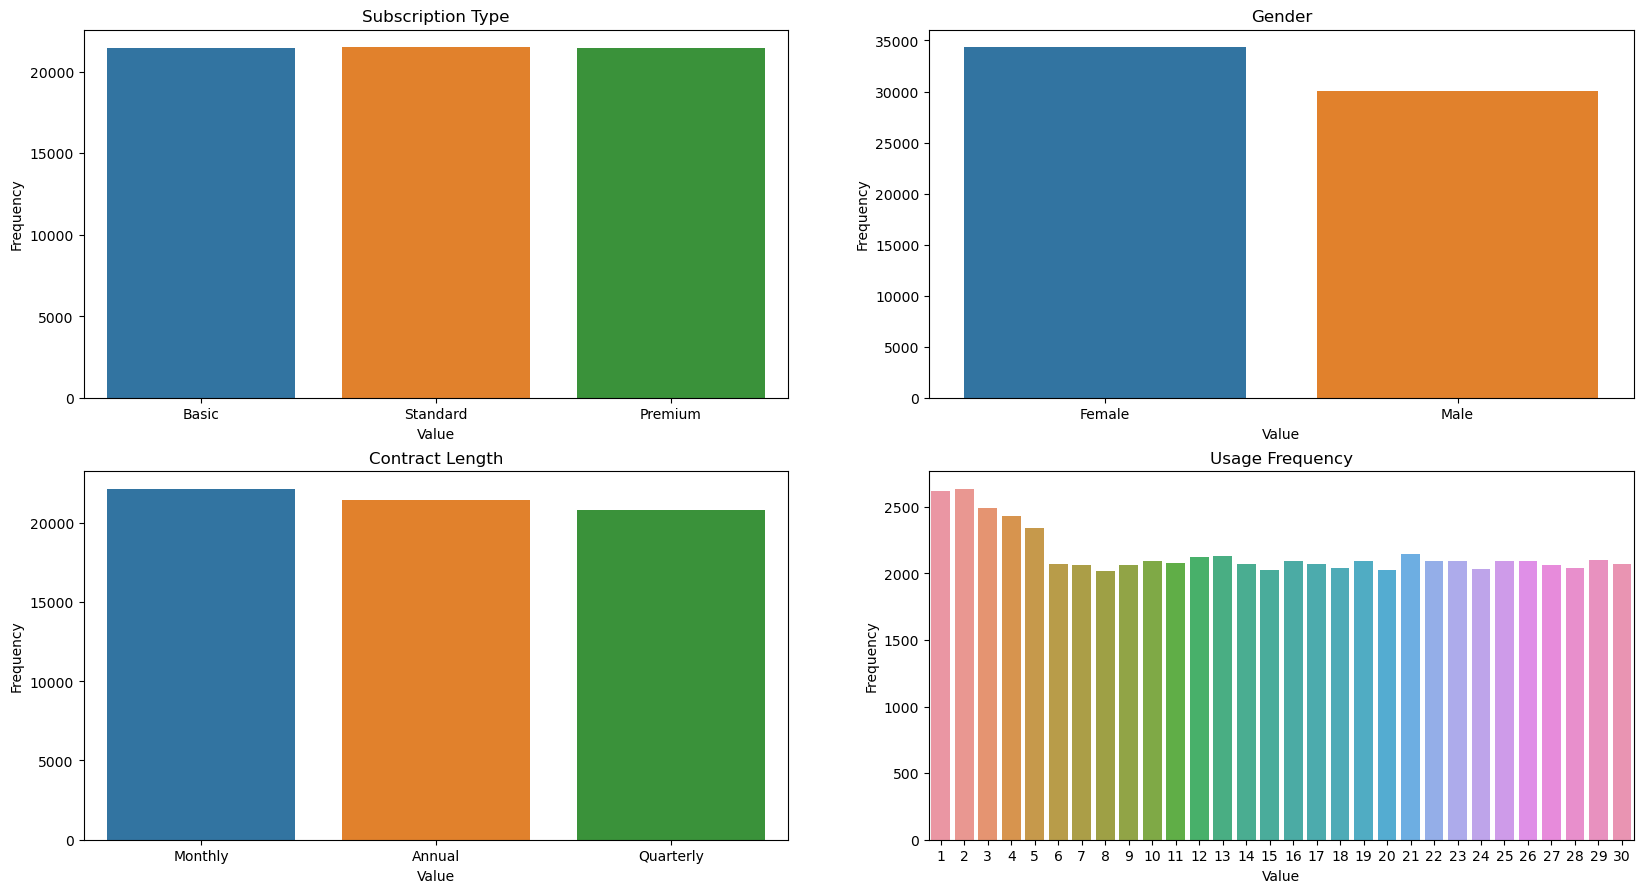

In [19]:
print("Count plot for categorical features:")
plt.figure(figsize=(20,22))

for i, column in enumerate(['Subscription Type','Gender','Contract Length','Usage Frequency']):
    plt.subplot(4,2,i + 1)
    sns.countplot(x= data[column], data=data)
    plt.title(column)
    plt.xlabel('Value')
    plt.ylabel('Frequency')

# Observation:
The count plots indicate that customers have subscription type mostly equal, also gender distribution is nearly balaned, also contract length is also balanced along with Usage Frequency.

Observing independent variables based on the Exited Column:


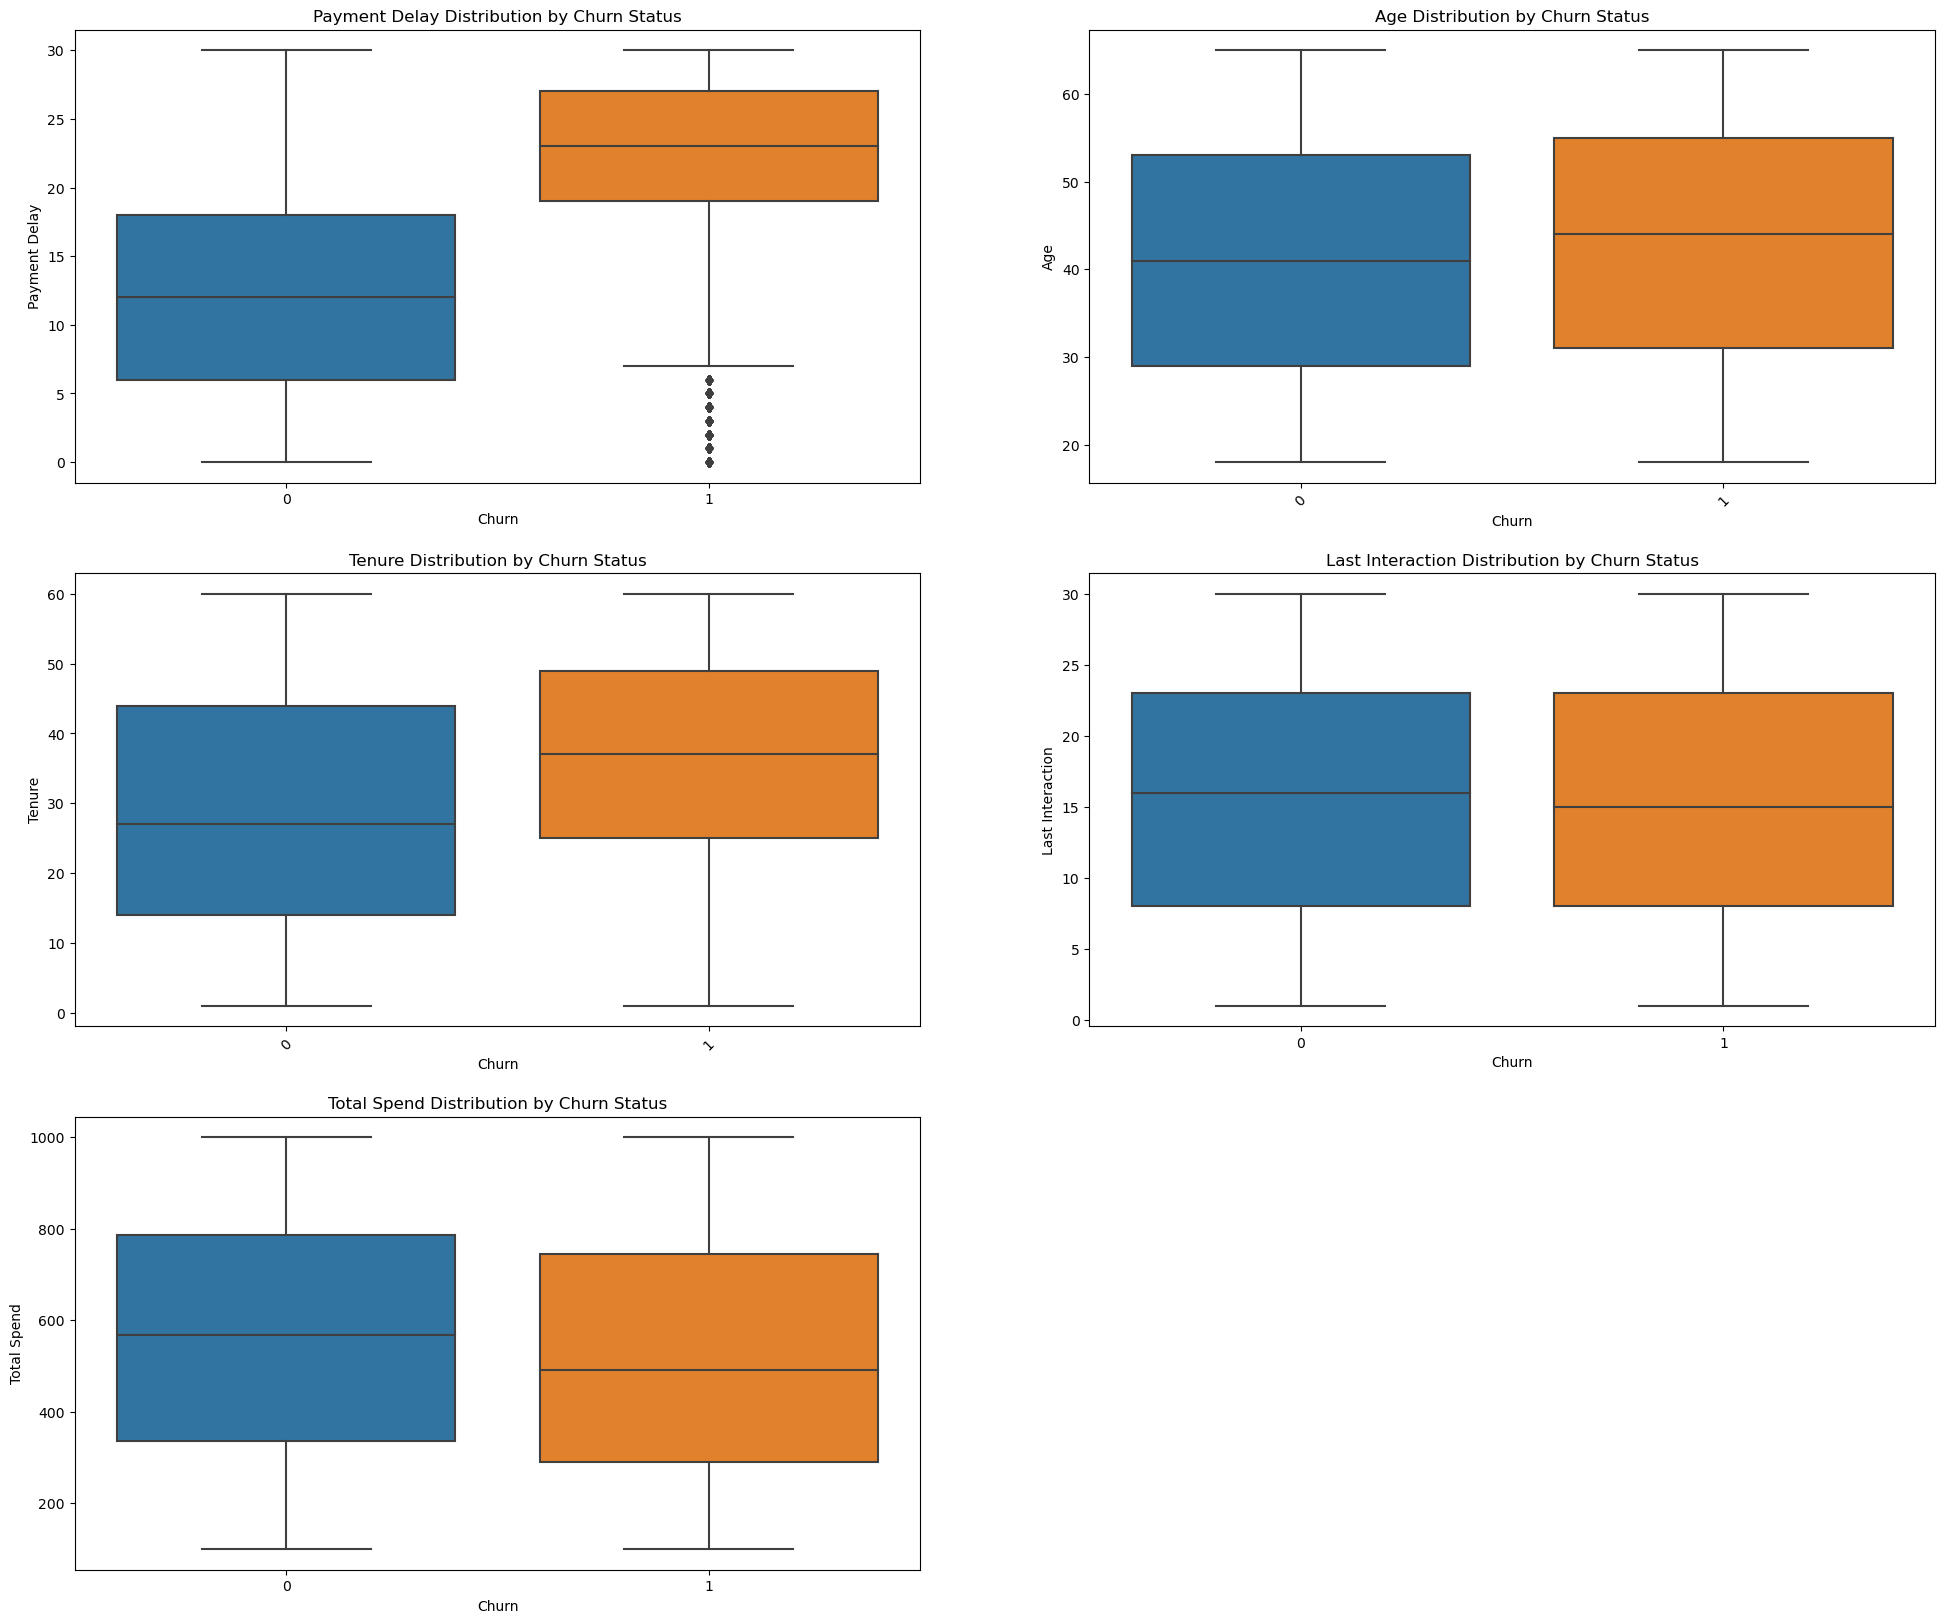

In [20]:
print("Observing independent variables based on the Exited Column:")

fig, axes = plt.subplots(3,2, figsize=(24,20))

sns.boxplot(data=data, y='Payment Delay', x ='Churn',  ax=axes[0,0])
axes[0,0].set_title('Payment Delay Distribution by Churn Status')

sns.boxplot(data=data, y='Age', x ='Churn', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Churn Status')
axes[0,1].tick_params(axis='x', rotation=45)

sns.boxplot(data=data, y='Tenure', x ='Churn', ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn Status')
axes[1,0].tick_params(axis='x', rotation=45)

sns.boxplot(data=data, y='Last Interaction', x ='Churn', ax=axes[1,1])
axes[1,1].set_title('Last Interaction Distribution by Churn Status')

sns.boxplot(data=data, y='Total Spend', x= 'Churn', ax=axes[2,0])
axes[2,0].set_title('Total Spend Distribution by Churn Status')

axes[2,1].axis('off')
plt.show()

# Observation:
The credit score distribution between customers who churned and those who did not churn is similar, indicating that the credit score may not be a strong predictor of churn.

The tenure distribution suggests that customers with a shorter tenure are slightly more likely to churn than those with a longer tenure.

Age distribution shows a more pronounced difference - older customers appear more likely to churn than younger ones.

Lastly, the balance distribution is significantly different, with churned customers having higher balances on average. This could indicate that customers with higher balances are at a higher risk of churn.

The estimated salary distribution does not show a stark difference between the churned and retained customers, suggesting that salary may not be a primary factor in the decision to churn.

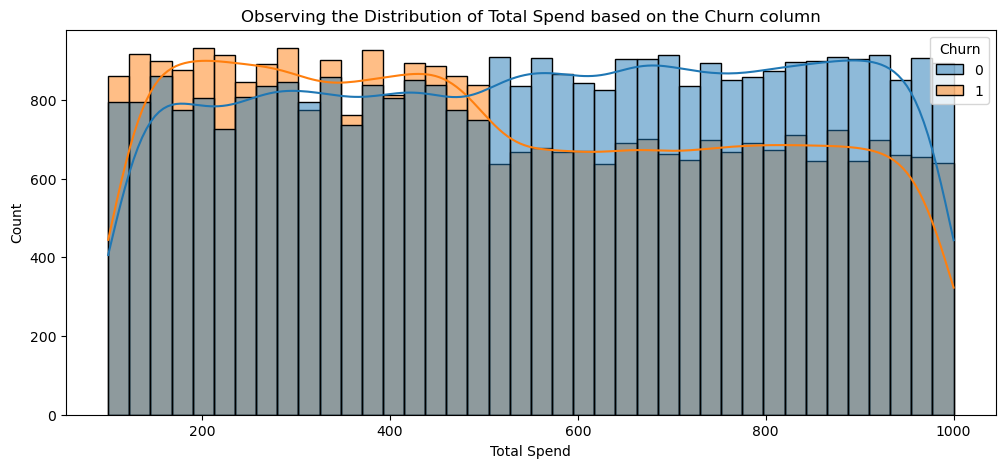

In [21]:
plt.figure(figsize=(12, 5))
sns.histplot(data=data, x='Total Spend', hue='Churn', kde=True)
plt.title('Observing the Distribution of Total Spend based on the Churn column')
plt.show()

# Observation:
By observing the distribution of Total Spend among customers who have churned versus those who haven't, we can see that there is no stark contrast between the two groups, implying that Total Spend alone may not be a strong predictor of churn within this dataset.

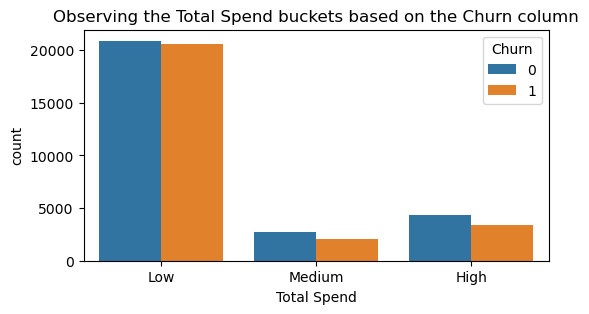

In [22]:
bins = [0,669,739,850]
labels = ['Low','Medium','High']

data['Total Spend'] = pd.cut(data['Total Spend'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(6,3))
sns.countplot(x = 'Total Spend', hue = 'Churn', data = data)
plt.title('Observing the Total Spend buckets based on the Churn column')
plt.show()

# Observation:
Majority of customers who churned are in the 'High' Total Spend group, suggesting that Total Spend might have some influence on churn, though not a straightforward one

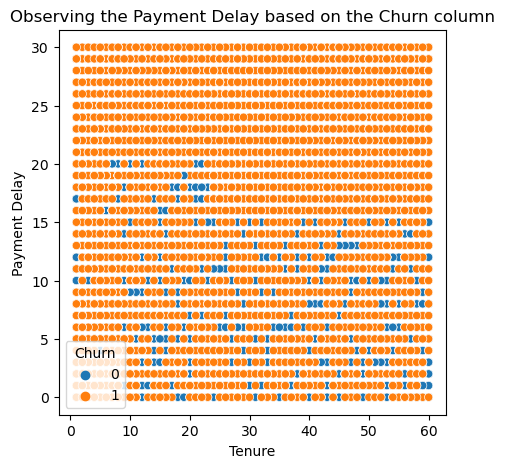

In [23]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='Tenure', y='Payment Delay', hue='Churn', data=data)
plt.title('Observing the Payment Delay based on the Churn column')
plt.show()

# Observation:
The scatter plot shows no clear correlation between Tenure and Payment Delay for churned and retained customers, suggesting these factors alone may not strongly predict churn

# Feature Engineering

Exploring the relationship between features

a. Credit Utilization: 
    
    Ratio of balance to credit score. It can give an insight into how much of the available credit the customer is using

b. Interaction Score: 
    
    A composite score based on the number of products, active membership, and credit card possession which can give a holistic view of a customer's engagement with the bank. Higher engagement levels might be associated with lower churn rates

c. Balance To Salary Ratio: 
    
    Ratio of the customer's balance to their estimated salary. This feature can indicate how significant the customer's balance is in relation to their income

d. Credit Score Age Interaction:
    
    An interaction term between credit score and age to explore if the impact of credit score on churn varies across different age groups

In [24]:
print(data.dtypes)
data['Tenure'] = pd.to_numeric(data['Tenure'], errors='coerce')
data['Total Spend'] = pd.to_numeric(data['Total Spend'], errors='coerce')

CustomerID              int64
Age                     int64
Gender                 object
Tenure                  int64
Usage Frequency         int64
Support Calls           int64
Payment Delay           int64
Subscription Type      object
Contract Length        object
Total Spend          category
Last Interaction        int64
Churn                   int64
Gender_encoded          int32
dtype: object


In [25]:
data['Tenure'] = data['Tenure'].fillna(0)  # Replace NaN with 0 or another strategy
data['Total Spend'] = data['Total Spend'].fillna(0)
data['SpendToTenureRatio'] = data['Total Spend'] / (data['Tenure'] + 1)  # Add 1 to avoid division by zero

In [26]:
import pandas as pd

# Sample DataFrame (Replace this with your actual data loading process)
data = pd.DataFrame({
    'Tenure': [12, None, 8, 20],
    'Total Spend': [2000, 1500, None, 5000],
    'Support Calls': [15, 8, 10, 20],
    'Usage Frequency': [3, 4, 2, 5],
    'Payment Delay': [5, None, 3, 2],
    'Age': [30, 40, 25, None],
    'Contract Length': [12, 24, None, 36],
    'Subscription Type': ['Basic', 'Premium', 'Basic', 'Premium']
})

# Fill missing values and handle data type conversion
data['Tenure'] = pd.to_numeric(data['Tenure'], errors='coerce').fillna(0)
data['Total Spend'] = pd.to_numeric(data['Total Spend'], errors='coerce').fillna(0)
data['Support Calls'] = pd.to_numeric(data['Support Calls'], errors='coerce').fillna(0)
data['Usage Frequency'] = pd.to_numeric(data['Usage Frequency'], errors='coerce').fillna(0)
data['Payment Delay'] = pd.to_numeric(data['Payment Delay'], errors='coerce').fillna(0)
data['Age'] = pd.to_numeric(data['Age'], errors='coerce').fillna(0)
data['Contract Length'] = pd.to_numeric(data['Contract Length'], errors='coerce').fillna(1)  # Avoid division by 0
# Feature Engineering
data['SpendToTenureRatio'] = data['Total Spend'] / (data['Tenure'] + 1)  # Add 1 to avoid division by zero
data['EngagementScore'] = data['Support Calls'] / (data['Tenure'] + 1) + data['Usage Frequency']
data['PaymentDelayToTenureRatio'] = data['Payment Delay'] / (data['Tenure'] + 1)
data['SpendAgeRatio'] = data['Total Spend'] / (data['Age'] + 1)  # Add 1 to avoid division by zero
data['TenureToContractRatio'] = data['Tenure'] / data['Contract Length']

# Handle categorical variables (One-hot encoding)
subscription_dummies = pd.get_dummies(data['Subscription Type'], prefix='Subscription')
data = pd.concat([data, subscription_dummies], axis=1)

# Drop original 'Subscription Type' column if not needed
data.drop(columns=['Subscription Type'], inplace=True)

# Output the processed DataFrame
print(data)

   Tenure  Total Spend  Support Calls  Usage Frequency  Payment Delay   Age  \
0    12.0       2000.0             15                3            5.0  30.0   
1     0.0       1500.0              8                4            0.0  40.0   
2     8.0          0.0             10                2            3.0  25.0   
3    20.0       5000.0             20                5            2.0   0.0   

   Contract Length  SpendToTenureRatio  EngagementScore  \
0             12.0          153.846154         4.153846   
1             24.0         1500.000000        12.000000   
2              1.0            0.000000         3.111111   
3             36.0          238.095238         5.952381   

   PaymentDelayToTenureRatio  SpendAgeRatio  TenureToContractRatio  \
0                   0.384615      64.516129               1.000000   
1                   0.000000      36.585366               0.000000   
2                   0.333333       0.000000               8.000000   
3                   0.095238

In [27]:
print(data.columns)

Index(['Tenure', 'Total Spend', 'Support Calls', 'Usage Frequency',
       'Payment Delay', 'Age', 'Contract Length', 'SpendToTenureRatio',
       'EngagementScore', 'PaymentDelayToTenureRatio', 'SpendAgeRatio',
       'TenureToContractRatio', 'Subscription_Basic', 'Subscription_Premium'],
      dtype='object')


In [28]:
try:
    y = data['Churn']
except KeyError:
    print("Column 'Churn' not found in data. Please check your data source.")
    
from sklearn.metrics import classification_report, confusion_matrix

# Prepare features and target
X = data.drop('Tenure', axis=1)  # Drop the 'Tenure' column from features

# Check if 'Churn' column exists (optional, using try-except)
try:
    y = data['Churn']
except KeyError:
    print("Column 'Churn' not found in data. Please check your data source.")
    exit()  # Or handle the error differently

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (assuming numerical features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Evaluate model
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print(feature_importance)

Column 'Churn' not found in data. Please check your data source.
Column 'Churn' not found in data. Please check your data source.


NameError: name 'y' is not defined

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Simulated data for demonstration (replace with actual dataset)
# Ensure your dataset does not have null values and target is binary (e.g., 0 or 1)
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'Tenure': np.random.randint(1, 10, 100),
    'Churn': np.random.choice([0, 1], 100)
})

# Drop 'Tenure' and prepare features (X) and target (y)
X = data.drop(['Tenure', 'Churn'], axis=1)
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model with class balancing
lr_model = LogisticRegression(class_weight='balanced', random_state=42)
lr_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred = lr_model.predict(X_test_scaled)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Perform cross-validation on training data
cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation mean accuracy:", cv_scores.mean())

# Extract and display feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(lr_model.coef_[0])
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.55      0.60        11
           1       0.55      0.67      0.60         9

    accuracy                           0.60        20
   macro avg       0.61      0.61      0.60        20
weighted avg       0.61      0.60      0.60        20

Confusion Matrix:
 [[6 5]
 [3 6]]
Cross-validation mean accuracy: 0.4875
Feature Importance:
     Feature  Importance
1  Feature2    0.230329
0  Feature1    0.139520
2  Feature3    0.010747


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Prepare features and target
X = data.drop('Tenure', axis=1)  # Drop the 'Tenure' column from features
y = data['Churn']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train K-Nearest Neighbors model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust `n_neighbors`
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(knn_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())

# Optional: Feature importance is not directly available in KNN, but you can try permutation importance if needed.


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[10  0]
 [ 0 10]]
Cross-Validation Accuracy: 1.0


In [2]:
pip install --upgrade scikit-learn xgboost

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Prepare features and target
X = data.drop('Tenure', axis=1)  # Drop the 'Tenure' column from features
y = data['Churn']                # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Gradient Boosting Classifier model
gbc_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)  # Adjust hyperparameters as needed
gbc_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gbc_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(gbc_model, X_train_scaled, y_train, cv=5)
print("Cross-Validation Accuracy:", cv_scores.mean())

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[10  0]
 [ 0 10]]
Cross-Validation Accuracy: 1.0


In [12]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Read data
data = pd.read_csv('C:/Users/siyal/Downloads/Customer_churn.csv')

# Remove CustomerID
data = data.drop('CustomerID', axis=1)

# Separate features and target
y = data['Churn']
X = data.drop('Churn', axis=1)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipelines for both numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Preprocess the data
X_preprocessed = preprocessor.fit_transform(X)

# Get feature names after preprocessing
categorical_feature_names = []
if len(categorical_features) > 0:
    categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = list(numeric_features) + list(categorical_feature_names)

# Convert to DataFrame
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed_df, y, test_size=0.2, random_state=42)

# Train model with better parameters to prevent overfitting
xgb_model = XGBClassifier(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Print results
print("\nFeature Names:", feature_names)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, val_idx in kf.split(X_train):
    cv_X_train, cv_X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    cv_y_train, cv_y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    cv_model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=100, eval_metric='logloss')
    cv_model.fit(cv_X_train, cv_y_train)
    cv_pred = cv_model.predict(cv_X_val)
    cv_scores.append(accuracy_score(cv_y_val, cv_pred))

print("\nCross-Validation Accuracy: {:.4f} (+/- {:.4f})".format(
    np.mean(cv_scores), np.std(cv_scores) * 2))

# Print feature importance
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_model.feature_importances_
})
print("\nTop 10 Most Important Features:")
print(importance_df.sort_values('importance', ascending=False).head(10))


Feature Names: ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Gender_Male', 'Subscription Type_Premium', 'Subscription Type_Standard', 'Contract Length_Monthly', 'Contract Length_Quarterly']

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6793
           1       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875


Confusion Matrix:
 [[6788    5]
 [   3 6079]]

Cross-Validation Accuracy: 0.9996 (+/- 0.0002)

Top 10 Most Important Features:
                      feature  importance
4               Payment Delay    0.412505
7                 Gender_Male    0.132587
3               Support Calls    0.127701
2             Usage Frequency    0.066324
0                         Age    0.065808
1               

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# First, let's handle the duplicate columns issue
def clean_duplicate_encoded_columns(data):
    # Remove original categorical columns if their one-hot encoded versions exist
    cols_to_drop = []
    if 'Subscription Type' in data.columns and 'Subscription Type_Basic' in data.columns:
        cols_to_drop.append('Subscription Type')
    if 'Contract Length' in data.columns and 'Contract Length_Monthly' in data.columns:
        cols_to_drop.append('Contract Length')
    
    return data.drop(columns=cols_to_drop)

# Clean the data
data = clean_duplicate_encoded_columns(data)

# Replace pandas NA with numpy nan
data = data.replace({pd.NA: np.nan})

# Separate features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns

# Create the preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

# Create the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

# Create the full pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GradientBoostingClassifier(n_estimators=100, 
                                            learning_rate=0.1, 
                                            max_depth=3, 
                                            random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Print evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5)
print("\nCross-Validation Accuracy: {:.3f} (+/- {:.3f})".format(
    cv_scores.mean(), cv_scores.std() * 2))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6793
         1.0       1.00      1.00      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875


Confusion Matrix:
[[6788    5]
 [  17 6065]]

Cross-Validation Accuracy: 0.997 (+/- 0.001)


1. CORRELATION ANALYSIS
--------------------------------------------------

Highly correlated features (>0.8):


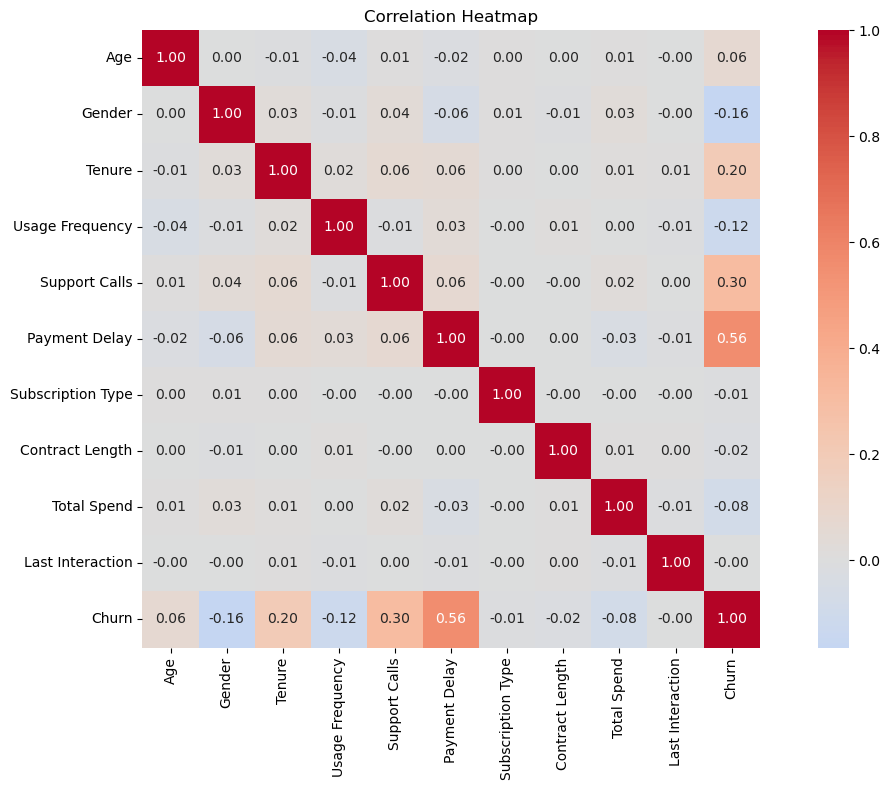


2. FEATURE DISTRIBUTIONS
--------------------------------------------------

Numerical Features Summary:
                Age        Tenure  Usage Frequency  Support Calls  \
count  64374.000000  64374.000000     64374.000000   64374.000000   
mean      41.970982     31.994827        15.080234       5.400690   
std       13.924911     17.098234         8.816470       3.114005   
min       18.000000      1.000000         1.000000       0.000000   
25%       30.000000     18.000000         7.000000       3.000000   
50%       42.000000     33.000000        15.000000       6.000000   
75%       54.000000     47.000000        23.000000       8.000000   
max       65.000000     60.000000        30.000000      10.000000   

       Payment Delay   Total Spend  Last Interaction         Churn  
count   64374.000000  64374.000000      64374.000000  64374.000000  
mean       17.133952    541.023379         15.498850      0.473685  
std         8.852211    260.874809          8.638436      0.49931

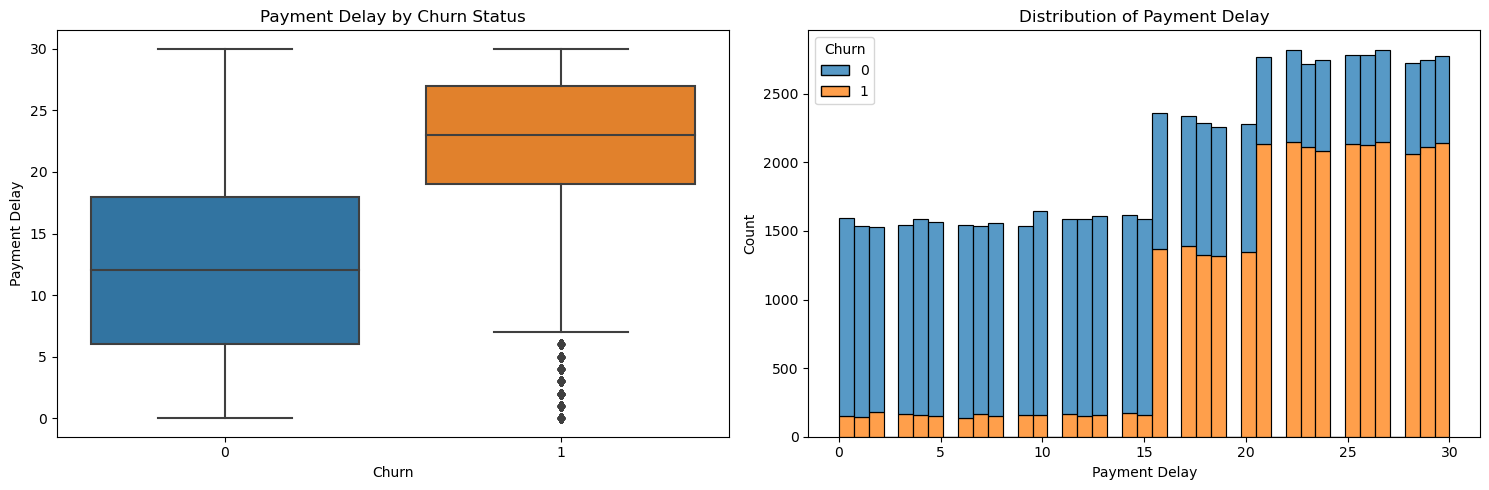

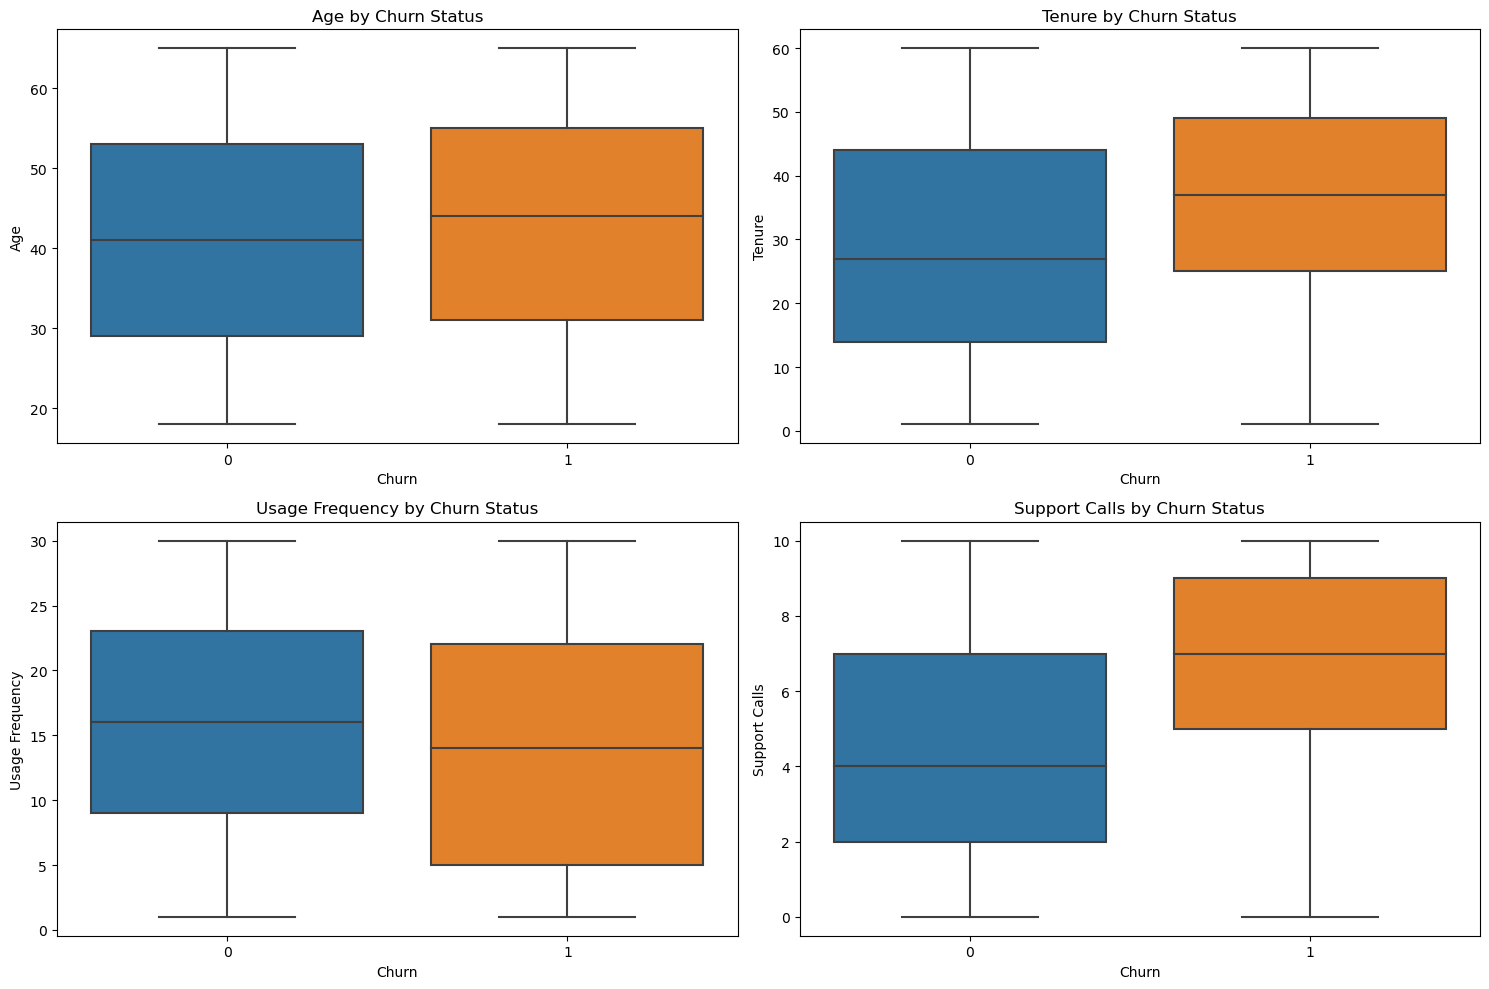


3. POTENTIAL DATA LEAKAGE CHECK
--------------------------------------------------


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Read the data
data = pd.read_csv('C:/Users/siyal/Downloads/Customer_churn.csv')
data = data.drop('CustomerID', axis=1)

# Create a copy of original data for later use
data_original = data.copy()

# Encode categorical variables
le = LabelEncoder()
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

# Now perform the correlation analysis
print("1. CORRELATION ANALYSIS")
print("-" * 50)
correlation_matrix = data.corr()
high_correlations = np.where(np.abs(correlation_matrix) > 0.8)
high_corr_pairs = [
    (data.columns[x], data.columns[y], correlation_matrix.iloc[x, y])
    for x, y in zip(*high_correlations)
    if x != y and x < y  # Avoid duplicates and self-correlations
]

print("\nHighly correlated features (>0.8):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1} - {feat2}: {corr:.3f}")

# Create a heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            fmt='.2f',
            square=True)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# 2. Feature Distributions
print("\n2. FEATURE DISTRIBUTIONS")
print("-" * 50)
print("\nNumerical Features Summary:")
numerical_cols = data_original.select_dtypes(include=['int64', 'float64']).columns
print(data_original[numerical_cols].describe())

print("\nCategorical Features Value Counts:")
for col in categorical_columns:
    print(f"\n{col} distribution:")
    print(data_original[col].value_counts(normalize=True).round(3) * 100, '%')

# 3. Payment Delay Analysis
plt.figure(figsize=(15, 5))

# Payment Delay by Churn Status
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Payment Delay', data=data_original)
plt.title('Payment Delay by Churn Status')

# Distribution of Payment Delay
plt.subplot(1, 2, 2)
sns.histplot(data=data_original, x='Payment Delay', hue='Churn', multiple="stack")
plt.title('Distribution of Payment Delay')

plt.tight_layout()
plt.show()

# 4. Feature Relationships with Churn
numerical_features = data_original.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(numerical_features[:4]):  # Plot first 4 numerical features
    sns.boxplot(x='Churn', y=col, data=data_original, ax=axes[idx])
    axes[idx].set_title(f'{col} by Churn Status')

plt.tight_layout()
plt.show()

# 5. Check for Potential Data Leakage
print("\n3. POTENTIAL DATA LEAKAGE CHECK")
print("-" * 50)
for column in data_original.columns:
    if column != 'Churn':
        # Calculate unique values ratio
        unique_by_churn = data_original.groupby('Churn')[column].nunique()
        if unique_by_churn.min() > 0:  # Avoid division by zero
            unique_ratio = unique_by_churn.max() / unique_by_churn.min()
            
            # Check if the ratio is suspicious
            if unique_ratio > 10:
                print(f"\nPossible leakage in {column}:")
                print(f"Unique values in churned customers: {unique_by_churn[1]}")
                print(f"Unique values in non-churned customers: {unique_by_churn[0]}")
                print(f"Ratio: {unique_ratio:.2f}")

Check for duplicated information in features

In [25]:
# Print correlation matrix to find highly correlated features
correlation_matrix = data.corr()
high_correlation = np.where(np.abs(correlation_matrix) > 0.8)

# Print highly correlated pairs (excluding self-correlation)
for i, j in zip(*high_correlation):
    if i != j and i < j:  # Avoid printing duplicates and self-correlations
        print(f"{data.columns[i]} & {data.columns[j]}: {correlation_matrix.iloc[i, j]:.2f}")

# Check for duplicate columns
duplicated_columns = data.T.duplicated()
print("\nDuplicated columns:", data.columns[duplicated_columns].tolist())


Duplicated columns: []


Verify train/test split:

In [26]:
# Check class distribution in both splits
print("Full dataset class distribution:")
print(y.value_counts(normalize=True))

print("\nTrain set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest set class distribution:")
print(y_test.value_counts(normalize=True))

# Use stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Full dataset class distribution:
Churn
0.0    0.526315
1.0    0.473685
Name: proportion, dtype: float64

Train set class distribution:
Churn
0.0    0.525991
1.0    0.474009
Name: proportion, dtype: float64

Test set class distribution:
Churn
0.0    0.527612
1.0    0.472388
Name: proportion, dtype: float64


Verify target encoding:

In [27]:
# Check target variable distribution
print("Target variable values:", y.unique())
print("Target variable counts:")
print(y.value_counts())

# Ensure binary classification is properly encoded
if not all(y.isin([0, 1])):
    print("Target needs to be encoded to 0/1")

Target variable values: [1. 0.]
Target variable counts:
Churn
0.0    33881
1.0    30493
Name: count, dtype: int64


Check categorical handling:

In [6]:
# Check categorical columns before encoding
cat_columns = X.select_dtypes(include=['object']).columns
print("Original categorical columns:", cat_columns.tolist())

# After one-hot encoding, verify no categorical data remains
encoded_cat_columns = X.select_dtypes(include=['object']).columns
print("Remaining categorical columns:", encoded_cat_columns.tolist())

# Check if any NaN values were introduced during encoding
print("\nNaN values after encoding:")
print(X.isna().sum())

# Verify one-hot encoded columns
one_hot_columns = [col for col in X.columns if '_' in col]
print("\nOne-hot encoded columns:", one_hot_columns)

NameError: name 'X' is not defined

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      6793
           1       1.00      0.99      1.00      6082

    accuracy                           1.00     12875
   macro avg       1.00      1.00      1.00     12875
weighted avg       1.00      1.00      1.00     12875

                       Feature    Importance
0                   CustomerID  4.984285e-01
5                Payment Delay  2.011583e-01
4                Support Calls  1.292605e-01
2                       Tenure  5.570301e-02
8                  Gender_Male  5.293821e-02
3              Usage Frequency  2.670945e-02
1                          Age  1.617955e-02
6                  Total Spend  1.076930e-02
11     Contract Length_Monthly  8.070059e-03
12   Contract Length_Quarterly  6.172453e-04
9    Subscription Type_Premium  1.387167e-04
10  Subscription Type_Standard  2.659117e-05
7             Last Interaction  5.797958e-07


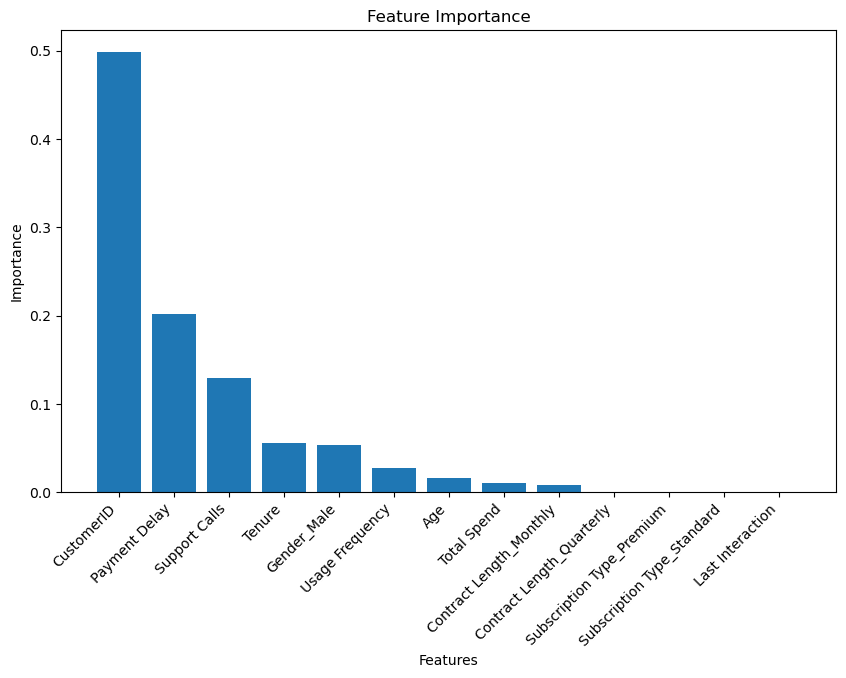

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load your dataset
data = pd.read_csv('C:/Users/siyal/Downloads/Customer_churn.csv')

# Define features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode categorical variables
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Initialize the model
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbc_model.fit(X_train, y_train)

# Predict on test set (optional)
y_pred = gbc_model.predict(X_test)
print(classification_report(y_test, y_pred))

# Get feature importances
feature_importances = gbc_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print(feature_importance_df)

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.show()
